In [1]:
from urn_packages import *
from tail_functions import *
from binary_tree_functions import *
from urn_functions import *
from plotting_functions import add_labels

In [2]:
#directory to save plots
direc_save ='/home/samuel/Documents/other/other_p/research/urns/code/urn_python_code/plots/' 

## C++ urn simulations, read in and plot

$N=1000$ agents for iterations $n=10^6,10^7,10^8,10^9$ with inital agents each with $1$ and feedback function
$f(w)=w^{\gamma}$ for $\gamma=1,1.1,1.2,1.3$

https://stackoverflow.com/questions/35672809/how-to-read-a-list-of-txt-files-in-a-folder-in-python

In [3]:
import glob
direc="/home/samuel/Documents/other/other_p/research/urns/code/urn_C++_code/output/"
txt_files = glob.glob(direc+"*.txt")
txt_files_arr=np.asarray(txt_files)
k=len(direc)

time_gamma=[]

for i in range(len(txt_files)):
    time=int(txt_files[i][k+1:k+2])
    gamma=float(txt_files[i][k+3:k+6])
    time_gamma.append([time,gamma])
    
#gets indices of sorted array sorted by second then first element
#https://stackoverflow.com/questions/7851077/how-to-return-index-of-a-sorted-list 
arg_sort=sorted(range(len(time_gamma)), key=lambda x: [time_gamma[x][1],time_gamma[x][0]]) 

txt_files_arr_sort=txt_files_arr[arg_sort]

data_arr_names = []
data_arr = []
for i in range(len(txt_files_arr_sort)):
    data_arr_names.append(txt_files_arr_sort[i][k:k+6])
    data=pd.read_csv(txt_files_arr_sort[i],sep='\t').values
    data_arr.append(data.ravel())
    
data_dict = {}

for i in range(len(data_arr)):
    data_dict[data_arr_names[i]]=data_arr[i]

print('File labels are:')
print(data_arr_names)

tails_x_y=[]
exp_fits=[]
tail_fits=[]

for i in range(len(data_arr_names)):
    d=data_dict[data_arr_names[i]]
    x,y=tail(d)
    tails_x_y.append([x,y])
    if(i<4):
        l=mle_exp_lambda(d)
        y_exp=exp_tail(x,l)
        exp_fits.append([x,y_exp])
    else:
        es,x_min=x_min_pred(d)
        x_pf,y_pf,a,b=get_power_law_fit(d,x_min)
        tail_fits.append([x_pf,y_pf,a,b])
        
        

File labels are:
['t1g1.0', 't2g1.0', 't3g1.0', 't4g1.0', 't1g1.1', 't2g1.1', 't3g1.1', 't4g1.1', 't1g1.2', 't2g1.2', 't3g1.2', 't4g1.2', 't1g1.3', 't2g1.3', 't3g1.3', 't4g1.3']


In [4]:
#Font sizes and labels for plots
font_sizes=[15,15,15,15,15]
label_arrI=[r'$w$',r'$\mathbb{P}(I_n>w)$',font_sizes,1]
label_arr=[r'$w$',r'$\mathbb{P}(W>w)$',font_sizes,1]
label_arr0=[r'$w$',r'$\mathbb{P}(W>w)$',font_sizes,0]

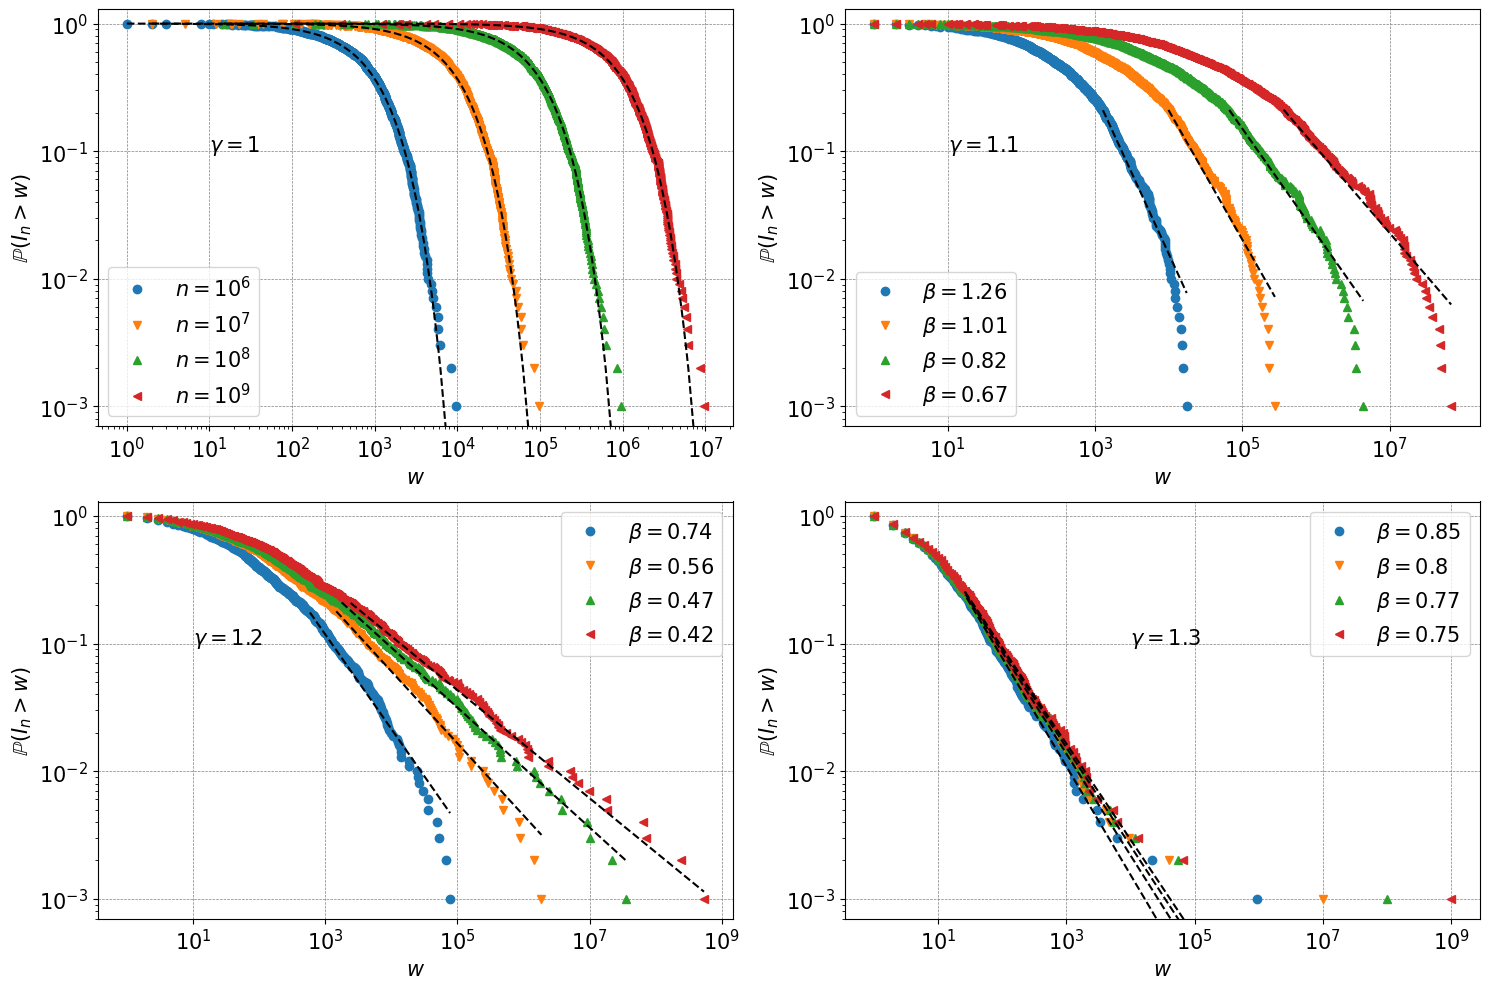

In [5]:
plt.figure(figsize=(15,10))

plt.subplot(2,2,1)
plt.loglog(*tails_x_y[0],'o',label=r'$n=10^6$')
plt.loglog(*tails_x_y[1],'v',label=r'$n=10^7$')
plt.loglog(*tails_x_y[2],'^',label=r'$n=10^8$')
plt.loglog(*tails_x_y[3],'<',label=r'$n=10^9$')

plt.loglog(*exp_fits[0],linestyle='--',color='black')
plt.loglog(*exp_fits[1],linestyle='--',color='black')
plt.loglog(*exp_fits[2],linestyle='--',color='black')
plt.loglog(*exp_fits[3],linestyle='--',color='black')

add_labels(plt,*label_arrI)
plt.text(10,10**-1,r'$\gamma=1$',fontsize=15)
plt.ylim(7*10**-4,1.3)

plt.subplot(2,2,2)
plt.loglog(*tails_x_y[4],'o',label=r'$\beta={}$'.format(np.round(tail_fits[0][3],2)))
plt.loglog(*tails_x_y[5],'v',label=r'$\beta={}$'.format(np.round(tail_fits[1][3],2)))
plt.loglog(*tails_x_y[6],'^',label=r'$\beta={}$'.format(np.round(tail_fits[2][3],2)))
plt.loglog(*tails_x_y[7],'<',label=r'$\beta={}$'.format(np.round(tail_fits[3][3],2)))

plt.loglog(tail_fits[0][0],tail_fits[0][1],linestyle='--',color='black')
plt.loglog(tail_fits[1][0],tail_fits[1][1],linestyle='--',color='black')
plt.loglog(tail_fits[2][0],tail_fits[2][1],linestyle='--',color='black')
plt.loglog(tail_fits[3][0],tail_fits[3][1],linestyle='--',color='black')

add_labels(plt,*label_arrI)
plt.text(10,10**-1,r'$\gamma=1.1$',fontsize=15)
plt.ylim(7*10**-4,1.3)


plt.subplot(2,2,3)
plt.loglog(*tails_x_y[8],'o',label=r'$\beta={}$'.format(np.round(tail_fits[4][3],2)))
plt.loglog(*tails_x_y[9],'v',label=r'$\beta={}$'.format(np.round(tail_fits[5][3],2)))
plt.loglog(*tails_x_y[10],'^',label=r'$\beta={}$'.format(np.round(tail_fits[6][3],2)))
plt.loglog(*tails_x_y[11],'<',label=r'$\beta={}$'.format(np.round(tail_fits[7][3],2)))

plt.loglog(tail_fits[4][0],tail_fits[4][1],linestyle='--',color='black')
plt.loglog(tail_fits[5][0],tail_fits[5][1],linestyle='--',color='black')
plt.loglog(tail_fits[6][0],tail_fits[6][1],linestyle='--',color='black')
plt.loglog(tail_fits[7][0],tail_fits[7][1],linestyle='--',color='black')

add_labels(plt,*label_arrI)
plt.text(10,10**-1,r'$\gamma=1.2$',fontsize=15)
plt.ylim(7*10**-4,1.3)

plt.subplot(2,2,4)
plt.loglog(*tails_x_y[12],'o',label=r'$\beta={}$'.format(np.round(tail_fits[8][3],2)))
plt.loglog(*tails_x_y[13],'v',label=r'$\beta={}$'.format(np.round(tail_fits[9][3],2)))
plt.loglog(*tails_x_y[14],'^',label=r'$\beta={}$'.format(np.round(tail_fits[10][3],2)))
plt.loglog(*tails_x_y[15],'<',label=r'$\beta={}$'.format(np.round(tail_fits[11][3],2)))

plt.loglog(tail_fits[8][0],tail_fits[8][1],linestyle='--',color='black')
plt.loglog(tail_fits[9][0],tail_fits[9][1],linestyle='--',color='black')
plt.loglog(tail_fits[10][0],tail_fits[10][1],linestyle='--',color='black')
plt.loglog(tail_fits[11][0],tail_fits[11][1],linestyle='--',color='black')

add_labels(plt,*label_arrI)
plt.text(10**4,10**-1,r'$\gamma=1.3$',fontsize=15)
plt.ylim(7*10**-4,1.3)

plt.tight_layout()

# plt.savefig(direc_save+'urn_cpp_tails',bbox_inches = 'tight')

## Run urn model in python

In [6]:
from scipy.stats import binom

#number of agents
N=10
N3=10**3

#All agents start equally with w0v
w0v=1

#Initial values of agents
w0=np.ones(N)*w0v 
w03=np.ones(N3)*w0v 
w0_binom=binom.rvs(n=N3*10,p=1/N3,size=N3)
print(np.where(w0_binom==0)) #unlikely to be 0

#Gamma values
g1=1
g1_1=1.1
g1_2=1.2
g1_3=1.3
gs=[g1,g1_1,g1_2,g1_3]

#Value to add at each iteration of urn model
w_add=1

#Number of iterations to run
T=10**5
T1=10**6
T2=10**7

(array([], dtype=int64),)


<module 'matplotlib.pyplot' from '/home/samuel/.local/lib/python3.7/site-packages/matplotlib/pyplot.py'>

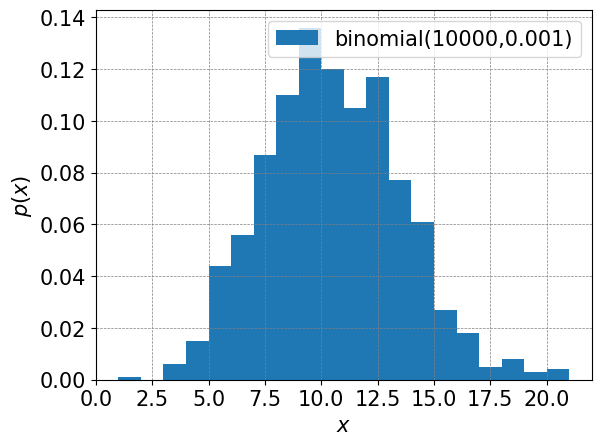

In [7]:
#Font sizes and labels for binomial dist. plot
label_arr_binom=[r'$x$',r'$p(x)$',font_sizes,1]
plt.hist(w0_binom,bins=20,density=True,label=r'binomial({},{})'.format(N3*10,1/N3))
add_labels(plt,*label_arr_binom)

Both functions below run the same urn model and we see it is faster when binary search is used

In [8]:
# %%time
# test1=nl_Polya_urn_stand(w0,w_add,g1,T)

In [9]:
# %%time
# test2=nl_Polya_urn_stand_bt(w0,w_add,g1,T)

## Approximation for expectation with fitness

<module 'matplotlib.pyplot' from '/home/samuel/.local/lib/python3.7/site-packages/matplotlib/pyplot.py'>

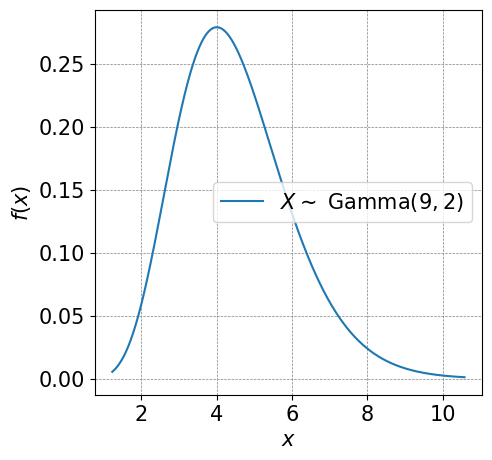

In [10]:
from scipy.stats import gamma as gamma_dist

#Gamma distributed fitness

interval=1000
lq=0.001
uq=0.999
alpha=9
beta=2

fitness=gamma_dist.rvs(a=alpha,scale=1/beta,size=N3)
x_gamma = np.linspace(gamma_dist.ppf(lq, a=alpha,scale=1/beta),\
gamma_dist.ppf(uq, a=alpha,scale=1/beta), interval)
y_gamma=gamma_dist.pdf(x_gamma,a=alpha,scale=1/beta)

#Font sizes and labels for gamma dist. plot
label_arr_gamma=[r'$x$',r'$f(x)$',font_sizes,1]

plt.figure(figsize=(5,5))

plt.plot(x_gamma,y_gamma,label=r'$X \sim$ Gamma$({},{})$'.format(alpha,beta))
add_labels(plt,*label_arr_gamma)

In [11]:
%%time

w_fitness=[]
tails_fitness=[]
fitness_tail_fits=[]

for i in range(len(gs)):
    w_fitness_g=nl_Polya_urn_stand_bt_fit(w0_binom,w_add,fitness,gs[i],T1)
    x,y=tail(w_fitness_g)
    w_fitness.append(w_fitness_g)
    tails_fitness.append([x,y])
    if i>0:
        es,x_min=x_min_pred(w_fitness_g)
        x_pf,y_pf,a,b=get_power_law_fit(w_fitness_g,x_min)
        fitness_tail_fits.append([x_pf,y_pf,a,b])


CPU times: user 4min 46s, sys: 152 ms, total: 4min 46s
Wall time: 4min 48s


(0.0005, 1.3)

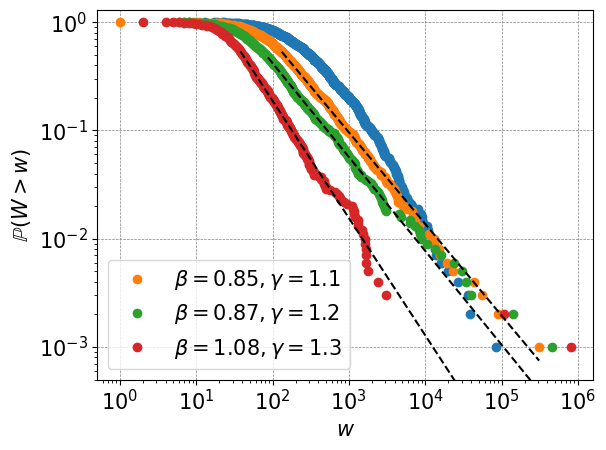

In [12]:
plt.loglog(*tails_fitness[0],'o')
b1=np.round(fitness_tail_fits[0][3],2)
b2=np.round(fitness_tail_fits[1][3],2)
b3=np.round(fitness_tail_fits[2][3],2)
plt.loglog(*tails_fitness[1],'o',label=r'$\beta={},\gamma={}$'.format(b1,gs[1]))
plt.loglog(*tails_fitness[2],'o',label=r'$\beta={},\gamma={}$'.format(b2,np.round(gs[2],2)))
plt.loglog(*tails_fitness[3],'o',label=r'$\beta={},\gamma={}$'.format(b3,np.round(gs[3],2)))
plt.loglog(fitness_tail_fits[0][0],fitness_tail_fits[0][1],color='black',linestyle='--')
plt.loglog(fitness_tail_fits[1][0],fitness_tail_fits[1][1],color='black',linestyle='--')
plt.loglog(fitness_tail_fits[2][0],fitness_tail_fits[2][1],color='black',linestyle='--')
add_labels(plt,*label_arr)
plt.ylim(5*10**-4,1.3)

In [13]:
t_tests=np.arange(0,1,0.01)
        
t_g1=find_t_g1(t_tests, w_fitness[0], w0_binom, fitness)
t_g1_1=find_t_g(t_tests, w_fitness[1], w0_binom, gs[1], fitness)
t_g1_2=find_t_g(t_tests, w_fitness[2], w0_binom, gs[2], fitness)
t_g1_3=find_t_g(t_tests, w_fitness[3], w0_binom, gs[3], fitness)

t_tests1=np.arange(t_g1_3,t_g1_3+0.01,0.001)

t_g1_3=find_t_g(t_tests1, w_fitness[3], w0_binom, gs[3], fitness)

print(t_g1,t_g1_1,t_g1_2,t_g1_3)

0.81 0.45 0.24 0.134


/home/samuel/Documents/other/other_p/research/urns/code/urn_python_code/urn_functions.py:99: RuntimeWarning: invalid value encountered in power
  k1=k**(-1/(g-1)) #g>1


In [14]:
#checking for initial times
print(dif_sum_func_g1(t_g1,np.sum(w_fitness[0]),w0_binom,fitness))
print(dif_sum_func_g1(t_g1+0.01,np.sum(w_fitness[0]),w0_binom,fitness))
print('')
print(dif_sum_func(t_g1_1,np.sum(w_fitness[1]),w0_binom,gs[1],fitness))
print(dif_sum_func(t_g1_1+0.01,np.sum(w_fitness[1]),w0_binom,gs[1],fitness))
print('')
print(dif_sum_func(t_g1_2,np.sum(w_fitness[2]),w0_binom,gs[2],fitness))
print(dif_sum_func(t_g1_2+0.01,np.sum(w_fitness[2]),w0_binom,gs[2],fitness))
print('')
print(dif_sum_func(t_g1_3,np.sum(w_fitness[3]),w0_binom,gs[3],fitness))
print(dif_sum_func(t_g1_3+0.001,np.sum(w_fitness[3]),w0_binom,gs[3],fitness))

38167.114555167966
-34303.47787524457

113592.40888949693
-134516.87609951408

354313.6510551134
-1479363.440079628

165585.7884479469
-559500.7087919682


In [15]:
init_ts=[t_g1,t_g1_1,t_g1_2,t_g1_3] #chosen using above

w_fitness_pred=[]

for i in range(len(w_fitness)):
    total=np.sum(w_fitness[i])
    init_t=init_ts[i]
    if i==0:
        params=[total,w0_binom,fitness]
        t_pred=get_time_g1(init_t,*params)
        print(t_pred)
        w_pred=expected_wealth_fit_pred_g1(t_pred,w0_binom,fitness)
        print(i)
    else:
        g=gs[i]
        params=[total,w0_binom,g,fitness]
        t_pred=get_time(init_t,*params)
        print(t_pred)
        w_pred=expected_wealth_fit_pred(t_pred,w0_binom,g,fitness)
        print(i)
        
    w_fitness_pred.append([t_pred,w_pred]) 
        

0.8153633867053054
0
0.45497607048995653
1
0.24381942862594802
2
0.1343143860777753
3


Text(10, 10000, '$\\gamma=1.3,\\,t=0.13$')

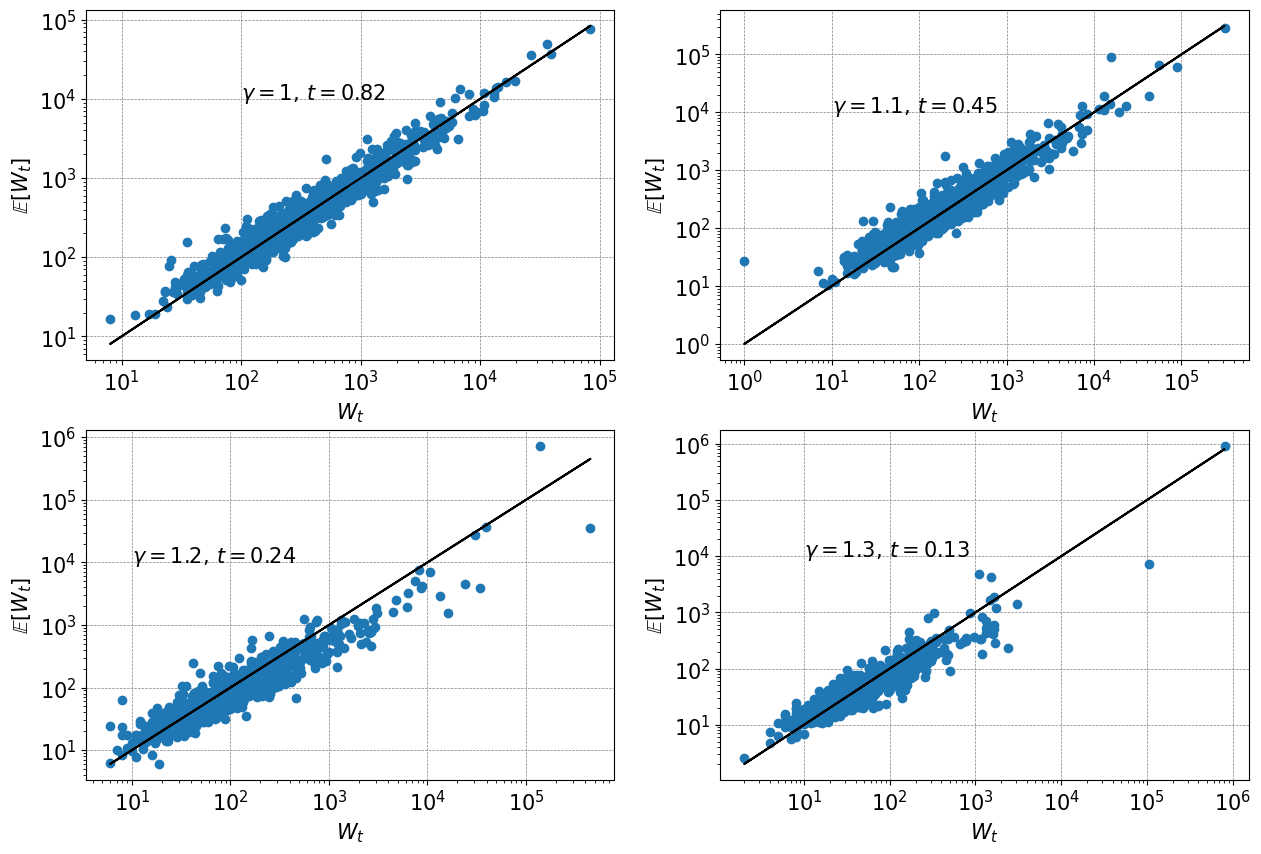

In [16]:
plt.figure(figsize=(15,10))

label_arr_w_pred=[r'$W_t$',r'$\mathbb{E}[W_t]$',font_sizes,0]

t1=np.round(w_fitness_pred[0][0],2)
t2=np.round(w_fitness_pred[1][0],2)
t3=np.round(w_fitness_pred[2][0],2)
t4=np.round(w_fitness_pred[3][0],2)

plt.subplot(2,2,1)
plt.loglog(w_fitness[0],w_fitness_pred[0][1],'o')
plt.loglog(w_fitness[0],w_fitness[0],color='black')
add_labels(plt,*label_arr_w_pred)
plt.text(10**2,10**4,r'$\gamma={},\,t={}$'.format(gs[0],t1),fontsize=15)

plt.subplot(2,2,2)
plt.loglog(w_fitness[1],w_fitness_pred[1][1],'o')
plt.loglog(w_fitness[1],w_fitness[1],color='black')
add_labels(plt,*label_arr_w_pred)
plt.text(10,10**4,r'$\gamma={},\,t={}$'.format(gs[1],t2),fontsize=15)

plt.subplot(2,2,3)
plt.loglog(w_fitness[2],w_fitness_pred[2][1],'o')
plt.loglog(w_fitness[2],w_fitness[2],color='black')
add_labels(plt,*label_arr_w_pred)
plt.text(10,10**4,r'$\gamma={},\,t={}$'.format(gs[2],t3),fontsize=15)

plt.subplot(2,2,4)
plt.loglog(w_fitness[3],w_fitness_pred[3][1],'o')
plt.loglog(w_fitness[3],w_fitness[3],color='black')
add_labels(plt,*label_arr_w_pred)
plt.text(10,10**4,r'$\gamma={},\,t={}$'.format(gs[3],t4),fontsize=15)

# plt.savefig(direc_save+'urn_expectation_preds',bbox_inches = 'tight')

## Sum formula prediction

In [17]:
g_sum=2.
t_sum=5
w0_sum=5
w_s_sum=300

w,A,p=get_sum_p(g_sum,t_sum,w0_sum,w_s_sum)

<module 'matplotlib.pyplot' from '/home/samuel/.local/lib/python3.7/site-packages/matplotlib/pyplot.py'>

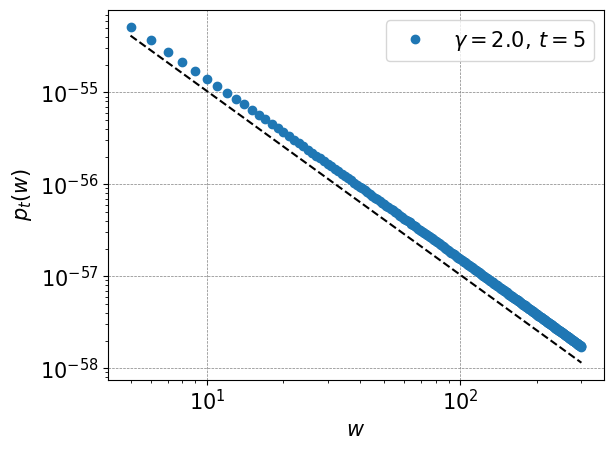

In [18]:
label_arr_dens_sum_pred=[r'$w$',r'$p_t(w)$',font_sizes,1]
plt.loglog(w,p,'o',label=r'$\gamma={},\,t={}$'.format(g_sum,t_sum))
plt.loglog(w,power_law(w,20*p[0],-g_sum),color='black',linestyle='--')
add_labels(plt,*label_arr_dens_sum_pred)

In [19]:
gs_sum=[1.0,1.2,1.4,1.6,1.8,2.0]
n_sum=len(gs_sum)
ts_sum=np.zeros(n_sum)
w0s_sum=np.zeros(n_sum)
w0s_sum=np.asarray(w0s_sum,int)
w_ss_sum=np.zeros(n_sum)
w_ss_sum=np.asarray(w_ss_sum,int)

c=0
if c<n_sum:
    ts_sum[c],w0s_sum[c],w_ss_sum[c]=2.5,1,200
    c+=1
if c<n_sum:
    ts_sum[c],w0s_sum[c],w_ss_sum[c]=3,1,300
    c+=1
if c<n_sum:
    ts_sum[c],w0s_sum[c],w_ss_sum[c]=2,1,300
    c+=1
if c<n_sum:
    ts_sum[c],w0s_sum[c],w_ss_sum[c]=2,1,300
    c+=1
if c<n_sum:
    ts_sum[c],w0s_sum[c],w_ss_sum[c]=2,1,300
    c+=1
if c<n_sum:
    ts_sum[c],w0s_sum[c],w_ss_sum[c]=2,1,300
    c+=1

print(gs_sum)
print(ts_sum)
print(w0s_sum)
print(w_ss_sum)

sum_preds=[]

for i in range(n_sum):
    w,A,p=get_sum_p(gs_sum[i],ts_sum[i],w0s_sum[i],w_ss_sum[i])
    sum_preds.append([w,A,p])
    print(i)
    
l=1/np.sum(sum_preds[0][0]*sum_preds[0][2])

[1.0, 1.2, 1.4, 1.6, 1.8, 2.0]
[2.5 3.  2.  2.  2.  2. ]
[1 1 1 1 1 1]
[200 300 300 300 300 300]
0
1
2
3
4
5


(1e-07, 0.3)

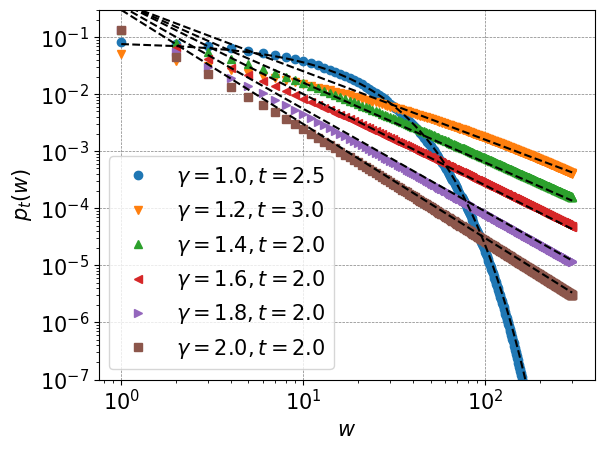

In [20]:
counter_types=['o','v','^','<','>','s']

for i in range(n_sum):
    plt.loglog(sum_preds[i][0],sum_preds[i][2],counter_types[i],
               label=r'$\gamma={}, t={}$'.format(gs_sum[i],ts_sum[i]))
    
w1=sum_preds[0][0]
w2=sum_preds[1][0]
w3=sum_preds[2][0]
w4=sum_preds[3][0]
w5=sum_preds[4][0]
w6=sum_preds[5][0]

plt.loglog(w1,l*exp_tail(w1,l),color='black',linestyle='--')
plt.loglog(w2,power_law(w2,0.4,-gs_sum[1]),color='black',linestyle='--')
plt.loglog(w3,power_law(w3,0.4,-gs_sum[2]),color='black',linestyle='--')
plt.loglog(w4,power_law(w4,0.4,-gs_sum[3]),color='black',linestyle='--')
plt.loglog(w5,power_law(w5,0.35,-gs_sum[4]),color='black',linestyle='--')
plt.loglog(w6,power_law(w6,0.3,-gs_sum[5]),color='black',linestyle='--')

add_labels(plt,*label_arr_dens_sum_pred)
plt.ylim(10**(-7),0.3)

# plt.savefig(direc_save+'urn_sum_preds',bbox_inches = 'tight')

## Aggregations

In [21]:
N_mult=10
w0_mult=np.ones(N_mult)
w_add_mult=1
g_mults=[1.2,1.4,1.6,1.8,2]
T_mult=10**4
ns_mult=1000

In [22]:
%%time

w_mult_concat_minus_v=[]

for i in range(len(g_mults)):
    w_mult=nl_Polya_urn_mult_times(w0_mult,w_add_mult,g_mults[i],T_mult,ns_mult)
    
    w_mult_concat_minus=get_losing(w_mult[0])

    for i in range(1,len(w_mult)):
        w_new=get_losing(w_mult[i])
        w_mult_concat_minus=np.concatenate((w_mult_concat_minus,w_new))
        
    w_mult_concat_minus_v.append(w_mult_concat_minus)
    
    print('done')
    

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277
278
279
280
281
282
283
284
285
286
287
288
289
290
291
292
293
294
295
296
297
298
299
300
301
302
303
304
305
306
307
308
309
310
311
312
313
314
315
316
317
318
319
320
321
322
323
324
325
326
327
328
329
330
331
332
333
334
335
336
337
338
339
340
341
342
343
344
345
346
347
348
349
350
351
352
353
354
355
356
357
358
359
360
361
362
363
364
365
366
367
368
369
370
371
372
373
374
375
376
377
378
379


233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277
278
279
280
281
282
283
284
285
286
287
288
289
290
291
292
293
294
295
296
297
298
299
300
301
302
303
304
305
306
307
308
309
310
311
312
313
314
315
316
317
318
319
320
321
322
323
324
325
326
327
328
329
330
331
332
333
334
335
336
337
338
339
340
341
342
343
344
345
346
347
348
349
350
351
352
353
354
355
356
357
358
359
360
361
362
363
364
365
366
367
368
369
370
371
372
373
374
375
376
377
378
379
380
381
382
383
384
385
386
387
388
389
390
391
392
393
394
395
396
397
398
399
400
401
402
403
404
405
406
407
408
409
410
411
412
413
414
415
416
417
418
419
420
421
422
423
424
425
426
427
428
429
430
431
432
433
434
435
436
437
438
439
440
441
442
443
444
445
446
447
448
449
450
451
452
453
454
455
456
457
458
459
460
461
462
463
464
465
466
467
468
469
470
471
472
473
474
475
476
477
478
479
480
481
482


In [23]:
mult_times_preds=[]

for i in range(len(w_mult_concat_minus_v)):
    w_mult_concat_minus=w_mult_concat_minus_v[i]
    x,y=tail(w_mult_concat_minus)
    mult_times_preds.append([x,y])
#     s=x_min_pred(w_mult_concat_minus)
#     x_min=s[1]
#     p=get_power_law_fit(w_mult_concat_minus,x_min)
#     mult_times_preds.append([x,y,x_min,p])
#     print(p[3],g_mults[i]-1)

<module 'matplotlib.pyplot' from '/home/samuel/.local/lib/python3.7/site-packages/matplotlib/pyplot.py'>

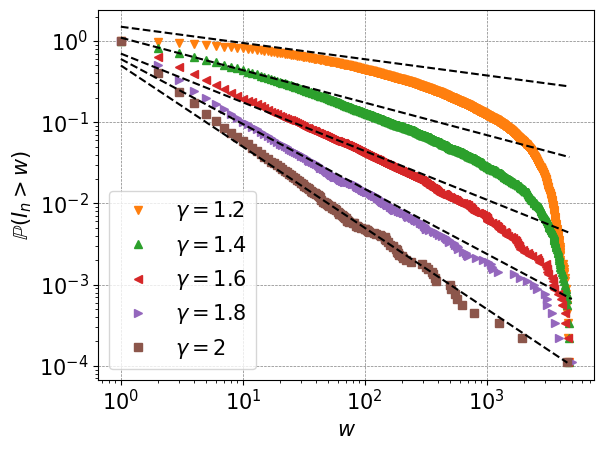

In [24]:
colors=['tab:orange','tab:green','tab:red','tab:purple','tab:brown']

for i in range(len(mult_times_preds)):
    plt.loglog(mult_times_preds[i][0],mult_times_preds[i][1],counter_types[i+1],
               label=r'$\gamma={}$'.format(g_mults[i]),color=colors[i])
#     plt.loglog(mult_times_preds[i][3][0],mult_times_preds[i][3][1],color='black',linestyle='--')

w_agg0=mult_times_preds[0][0]
w_agg1=mult_times_preds[1][0]
w_agg2=mult_times_preds[2][0]
w_agg3=mult_times_preds[3][0]
w_agg4=mult_times_preds[4][0]

plt.loglog(w_agg0,power_law(w_agg0,1.5,1-g_mults[0]),color='black',linestyle='--')
plt.loglog(w_agg1,power_law(w_agg1,1.1,1-g_mults[1]),color='black',linestyle='--')
plt.loglog(w_agg2,power_law(w_agg2,0.7,1-g_mults[2]),color='black',linestyle='--')
plt.loglog(w_agg3,power_law(w_agg3,0.6,1-g_mults[3]),color='black',linestyle='--')
plt.loglog(w_agg4,power_law(w_agg4,0.5,1-g_mults[4]),color='black',linestyle='--')

add_labels(plt,*label_arrI)

# plt.savefig(direc_save+'urn_agg_tails',bbox_inches = 'tight')